<a href="https://colab.research.google.com/github/Nik-Kras/Hack-15_Stochastic_Schedule_Optimisation/blob/main/Hackathon_Graph_build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Graph build with Keras

In [2]:
import os
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

To load data I connect to Google Drive folder with tables

In [5]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
os.chdir('drive/MyDrive/Colab Notebooks/Hackathon: Hack15')

In [10]:
!ls

project-1  project-2


Loading tables. Starting with Project 1

In [18]:
LinkTable = pd.read_csv ('project-1/link.csv')
print(LinkTable)

            start           end             type  lag
0    c080f39cf7f2  584ed2e099d4  FINISH_TO_START  0.0
1    d2ce0d28ff38  f98770e75277  FINISH_TO_START  0.0
2    75cf0d716f8a  f98770e75277  FINISH_TO_START  0.0
3    fdae805d8ce7  0d7f88a9aafc   START_TO_START  3.0
4    aad663ce7657  fdae805d8ce7  FINISH_TO_START  0.0
..            ...           ...              ...  ...
933  53f91203c360  7c16c894bad2  FINISH_TO_START  0.0
934  78ff0c6bf437  5fa83cdda518  FINISH_TO_START  0.0
935  3c501865e67b  78ff0c6bf437  FINISH_TO_START  0.0
936  156610441345  88336880adc8  FINISH_TO_START  0.0
937  156610441345  083ed1594c78  FINISH_TO_START  0.0

[938 rows x 4 columns]


In [34]:
TaskNames = LinkTable['start'].unique()
TaskNames[0:10], TaskNames.size

(array(['c080f39cf7f2', 'd2ce0d28ff38', '75cf0d716f8a', 'fdae805d8ce7',
        'aad663ce7657', '9d60a4fe2ca9', '446a4fc23342', '011cfb415526',
        '8d0d12842898', 'f98770e75277'], dtype=object), 432)

**The number of relations could serve as an additional feature**

In [33]:
LinkTable[LinkTable['start'] == TaskNames[0]]

,start,end,type,lag
0,c080f39cf7f2,584ed2e099d4,FINISH_TO_START,0.0
235,c080f39cf7f2,eeba577c3608,FINISH_TO_START,0.0
239,c080f39cf7f2,74c8a91750f5,FINISH_TO_START,0.0
286,c080f39cf7f2,5c6df9d42449,FINISH_TO_START,0.0
289,c080f39cf7f2,099fda6889f8,FINISH_TO_START,3.0
526,c080f39cf7f2,7d581799da3f,FINISH_TO_START,0.0
532,c080f39cf7f2,eab3e2e39c4b,FINISH_TO_START,0.0
543,c080f39cf7f2,3216f9c2c12c,FINISH_TO_START,0.0
553,c080f39cf7f2,ae612ec2a986,FINISH_TO_START,0.0
558,c080f39cf7f2,a178ec552b06,FINISH_TO_START,0.0


Testing database

In [19]:
zip_file = keras.utils.get_file(
    fname="cora.tgz",
    origin="https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz",
    extract=True,
)
data_dir = os.path.join(os.path.dirname(zip_file), "cora")

180224/168052 [================================] - 0s 0us/step


In [21]:
citations

,target,source
0,35,1033
1,35,103482
2,35,103515
3,35,1050679
4,35,1103960
...,...,...
5424,853116,19621
5425,853116,853155
5426,853118,1140289
5427,853155,853118


In [40]:
ColourLink = LinkTable['lag']
ColourLink

0      0.0
1      0.0
2      0.0
3      3.0
4      0.0
      ... 
933    0.0
934    0.0
935    0.0
936    0.0
937    0.0
Name: lag, Length: 938, dtype: float64

In [ ]:
plt.figure(figsize=(10, 10))
colors = TaskNames["lag"].tolist()
cora_graph = nx.from_pandas_edgelist(citations.sample(n=1500))
subjects = list(papers[papers["paper_id"].isin(list(cora_graph.nodes))]["subject"])
nx.draw_spring(cora_graph, node_size=15, node_color=subjects)

# Example of Graph build!

In [41]:
citations = pd.read_csv(
    os.path.join(data_dir, "cora.cites"),
    sep="\t",
    header=None,
    names=["target", "source"],
)
print("Citations shape:", citations.shape)

Citations shape: (5429, 2)


In [48]:
citations[0:5]

,target,source
0,0,21
1,0,905
2,0,906
3,0,1909
4,0,1940


In [43]:
column_names = ["paper_id"] + [f"term_{idx}" for idx in range(1433)] + ["subject"]
papers = pd.read_csv(
    os.path.join(data_dir, "cora.content"), sep="\t", header=None, names=column_names,
)
print("Papers shape:", papers.shape)

Papers shape: (2708, 1435)


In [49]:
papers[0:5]

,paper_id,term_0,term_1,term_2,term_3,term_4,term_5,term_6,term_7,term_8,...,term_1424,term_1425,term_1426,term_1427,term_1428,term_1429,term_1430,term_1431,term_1432,subject
0,462,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
1,1911,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,5
2,2002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,248,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,519,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [44]:
class_values = sorted(papers["subject"].unique())
class_idx = {name: id for id, name in enumerate(class_values)}
paper_idx = {name: idx for idx, name in enumerate(sorted(papers["paper_id"].unique()))}

papers["paper_id"] = papers["paper_id"].apply(lambda name: paper_idx[name])
citations["source"] = citations["source"].apply(lambda name: paper_idx[name])
citations["target"] = citations["target"].apply(lambda name: paper_idx[name])
papers["subject"] = papers["subject"].apply(lambda value: class_idx[value])

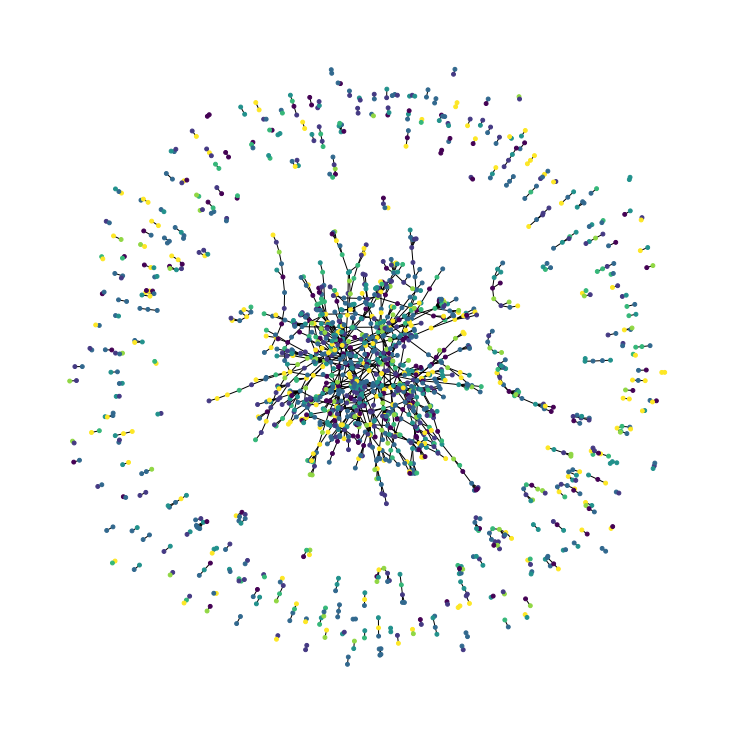

In [45]:
plt.figure(figsize=(10, 10))
colors = papers["subject"].tolist()
cora_graph = nx.from_pandas_edgelist(citations.sample(n=1500))
subjects = list(papers[papers["paper_id"].isin(list(cora_graph.nodes))]["subject"])
nx.draw_spring(cora_graph, node_size=15, node_color=subjects)

# Another Example on the same DataSet


In [51]:
# Import packages
from tensorflow import __version__ as tf_version, float32 as tf_float32, Variable
from tensorflow.keras import Sequential, Model
from tensorflow.keras.backend import variable, dot as k_dot, sigmoid, relu
from tensorflow.keras.layers import Dense, Input, Concatenate, Layer
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import plot_model
from tensorflow.random import set_seed as tf_set_seed
from numpy import __version__ as np_version, unique, array, mean, argmax
from numpy.random import seed as np_seed, choice
from pandas import __version__ as pd_version, read_csv, DataFrame, concat
from sklearn import __version__ as sk_version
from sklearn.preprocessing import normalize

In [60]:
dtf_graph = concat((dtf_graph, dtf_graph_tmp)).sort_values(["cited_paper_id", "citing_paper_id"], ascending=True)

In [61]:
dtf_graph

,cited_paper_id,citing_paper_id,connection
0,35,35,0
163,35,887,1
0,35,1033,1
59,35,1688,1
65,35,1956,1
...,...,...,...
2703,1154500,1154500,0
2704,1154520,1154520,0
2705,1154524,1154524,0
2706,1154525,1154525,0


In [62]:
# Load cora data
dtf_data = read_csv("https://raw.githubusercontent.com/ngshya/datasets/master/cora/cora_content.csv").sort_values(["paper_id"], ascending=True)
dtf_graph = read_csv("https://raw.githubusercontent.com/ngshya/datasets/master/cora/cora_cites.csv")
# Adjacency matrix
array_papers_id = unique(dtf_data["paper_id"])
dtf_graph["connection"] = 1
dtf_graph_tmp = DataFrame({"cited_paper_id": array_papers_id, "citing_paper_id": array_papers_id, "connection": 0})
dtf_graph = concat((dtf_graph, dtf_graph_tmp)).sort_values(["cited_paper_id", "citing_paper_id"], ascending=True)
dtf_graph = dtf_graph.pivot_table(index="cited_paper_id", columns="citing_paper_id", values="connection", fill_value=0).reset_index(drop=True)
A = array(dtf_graph)
A = normalize(A, norm='l1', axis=1)
A = variable(A, dtype=tf_float32)
# Feature matrix
data = array(dtf_data.iloc[:, 1:1434])
# Labels
labels = array(
    dtf_data["label"].map({
        'Case_Based': 0,
        'Genetic_Algorithms': 1,
        'Neural_Networks': 2,
        'Probabilistic_Methods': 3,
        'Reinforcement_Learning': 4,
        'Rule_Learning': 5,
        'Theory': 6
    })
)
# Check dimensions
print("Features matrix dimension:", data.shape, "| Label array dimension:", labels.shape, "| Adjacency matrix dimension:", A.shape)

Features matrix dimension: (2708, 1433) | Label array dimension: (2708,) | Adjacency matrix dimension: (2708, 2708)


In [63]:
# Training parameters
input_shape = (data.shape[1], )
output_classes = len(unique(labels))
iterations = 50
epochs = 100
batch_size = data.shape[0]
labeled_portion = 0.10